In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
 %cd /content/gdrive/My\ Drive/Sdataset

/content/gdrive/My Drive/Sdataset


/content/gdrive/My Drive/Sdataset
Found 850 images belonging to 10 classes.
Found 252 images belonging to 10 classes.


INFO:log:---after conv-1----
INFO:log:---after conv-2----
INFO:log:---after conv-3----
INFO:log:---after conv-4----
--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.7/logging/__init__.py", line 1025, in emit
    msg = self.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 869, in format
    return fmt.format(record)
  File "/usr/lib/python3.7/logging/__init__.py", line 608, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.7/logging/__init__.py", line 369, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:


Model: "sequential"
_________________________________________________________________


  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.7/dist-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "/usr/local/lib/python3.7/dist-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.7/dist-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
    self._run_once()
  File "/usr/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
    handle._run()
  File "/usr/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/usr

 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 128)      512       
 hNormalization)                                                 
          

INFO:log:---after 20 epochs----


Epoch 1/20
13/13 [==============================] - 239s 18s/step - loss: 1.6895 - accuracy: 0.4211 - val_loss: 18.1499 - val_accuracy: 0.0573
Epoch 2/20
13/13 [==============================] - 4s 288ms/step - loss: 0.9537 - accuracy: 0.6921 - val_loss: 15.3838 - val_accuracy: 0.0677
Epoch 3/20
13/13 [==============================] - 4s 294ms/step - loss: 0.6482 - accuracy: 0.7964 - val_loss: 6.5024 - val_accuracy: 0.0781
Epoch 4/20
13/13 [==============================] - 4s 300ms/step - loss: 0.4889 - accuracy: 0.8537 - val_loss: 3.4548 - val_accuracy: 0.1250
Epoch 5/20
13/13 [==============================] - 4s 301ms/step - loss: 0.3746 - accuracy: 0.8880 - val_loss: 3.0443 - val_accuracy: 0.1198
Epoch 6/20
13/13 [==============================] - 4s 300ms/step - loss: 0.3343 - accuracy: 0.9014 - val_loss: 1.5594 - val_accuracy: 0.5156
Epoch 7/20
13/13 [==============================] - 4s 288ms/step - loss: 0.2185 - accuracy: 0.9377 - val_loss: 1.2850 - val_accuracy: 0.5990
Epoc

INFO:log:---history "{{history}}"----


'Tomato___Septoria_leaf_spot'

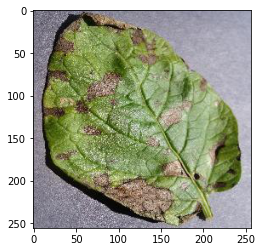

In [ ]:
# importing libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
# import pandas as pdß

import logging
logger = logging.getLogger('log')

logging.basicConfig(
    level=logging.INFO 
)


%cd /content/gdrive/My\ Drive/Sdataset


# Defining train and test data to train the model
img_size=48
batch_size=64
datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory('/content/gdrive/MyDrive/Sdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)
datagen_validation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory('/content/gdrive/MyDrive/Sdataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',target_size=
(48,48), batch_size=batch_size, class_mode='categorical', shuffle=True)

#initialising CNN
model=Sequential()
#conv-1
model.add(Conv2D(64,(3,3), padding='same', input_shape= (224,224,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#conv-2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#conv-3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#conv-4
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(9, activation='softmax'))

opt=Adam(learning_rate=0.0005)


#compiling the model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

epochs=20

logger.info('---training the model----')
steps_per_epoch=train_generator.n//train_generator.batch_size
steps_per_epoch
validation_steps=validation_generator.n//validation_generator.batch_size


logger.info('---after %d epochs----', epochs)

checkpoint=ModelCheckpoint("model_weights.h5", monitor="val_accuracy", save_weights_only=True, model='max', verbose=1)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor=0.1, patience=2, min_lr= 0.00001, model= 'auto')

history= model.fit(
          x=train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=validation_generator, validation_steps=validation_steps)


#@title Default title text
from tensorflow.keras.models import load_model
classifier = load_model('vgg16_exp1.hdf5')

import numpy as np
from tensorflow.keras.preprocessing import image
path = "/content/gdrive/MyDrive/PotatoEarlyBlight1.JPG"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(224,224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

In [ ]:
# !python plantdisease.py

'Apple___Apple_scab'

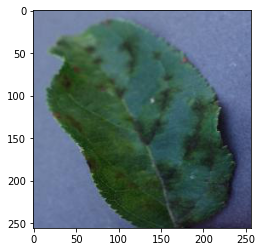

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# /content/gdrive/MyDrive/AppleScab2.JPG
path = "/content/gdrive/MyDrive/AppleScab2.JPG"
test_image = image.load_img(path)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.imshow(test_image)
test_img = image.load_img(path, target_size=(48,48))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img,axis=0)
result = classifier.predict(test_img)
a = result.argmax()
s = train_generator.class_indices
name = [ ]
for i in s:
     name.append(i)
for i in range(len(s)):
     if (i==a):
          p=name[i]
p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')